In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from textblob import TextBlob
import text2emotion as te
import nltk
from sklearn.tree import export_graphviz
# import pydotplus
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
df = pd.read_excel("../Data/data_final_zoning_sentence_v1.xlsx")

In [3]:
labels = ["Purple - Introduction",
          "Red - Plot",
          "Blue - General",
          "Green - Details",
          "Orange - Performances",
          "Brown - Structure",
          "Yellow - Conclusion"]

In [4]:
features_review = ['Review - Count Character',
                   'Review - Beginning_Cat',
                   'Review - Body',
                   'Review - Love',
                   'Review - Compound',
                   'Review - Neu',
                   'Review - Polarity',
                   'Review - Length_Start_Count_Words_3',
                   'Review - Length_Start_Count_Words_1']
features_sentence = ['Sentence - Noms', 'Sentence - Count Word',
                     'Sentence - 3e_pers_s',
                     'Sentence - Start Index',
                     'Sentence - Adverbes',
                     'Sentence - Polarity',
                     'Sentence - Word_Average',
                     'Sentence - Passe',
                     'Sentence - Verbes',
                     'Sentence - Subjectivity',
                     'Sentence - Adjectifs']

features = features_review + features_sentence

In [5]:
X = df[features]

y = df['Target_Variable_Sentence_Type']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(min_samples_leaf=10)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
# Predicting the test results
y_pred=clf.predict(X_test)

# Classification results on test set
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred, target_names=labels))

Accuracy: 0.54
Confusion Matrix: 
 [[35 11  1  0  0  0  0]
 [ 9 29  5  0  1  0  0]
 [ 0 11 20  1  4  0  6]
 [ 0  7  0  4  2  0  1]
 [ 0  5  4  0  4  0  7]
 [ 0  1  2  1  0  0  3]
 [ 0  4  1  2  0  0 14]]
                       precision    recall  f1-score   support

Purple - Introduction       0.80      0.74      0.77        47
           Red - Plot       0.43      0.66      0.52        44
       Blue - General       0.61      0.48      0.53        42
      Green - Details       0.50      0.29      0.36        14
Orange - Performances       0.36      0.20      0.26        20
    Brown - Structure       0.00      0.00      0.00         7
  Yellow - Conclusion       0.45      0.67      0.54        21

             accuracy                           0.54       195
            macro avg       0.45      0.43      0.43       195
         weighted avg       0.54      0.54      0.53       195



C:\Users\theo-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\theo-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\theo-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h3> Comme ce qui nous intéresse est de retirer la partie 'introduction' et 'plot', on créé un modèle de classification à deux classes: </h3>

In [6]:
df_2_classes = df.where(df['Target_Variable_Sentence_Type']>2, 0)
df_2_classes = df_2_classes.where(df['Target_Variable_Sentence_Type']<=2, 1)

In [7]:
X = df[features]

y = df_2_classes['Target_Variable_Sentence_Type']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) # 50% training and 50% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(min_samples_leaf=10)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
# Predicting the test results
y_pred=clf.predict(X_test)

# Classification results on test set
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred, target_names=['Intro & Plot', 'Others']))

Accuracy: 0.84
Confusion Matrix: 
 [[159  21]
 [ 31 114]]
              precision    recall  f1-score   support

Intro & Plot       0.84      0.88      0.86       180
      Others       0.84      0.79      0.81       145

    accuracy                           0.84       325
   macro avg       0.84      0.83      0.84       325
weighted avg       0.84      0.84      0.84       325



<h3> On obtient tout de suite de meilleurs résultats!! </h3>

<h3> On regarde l'importance des prédicteurs </h3>

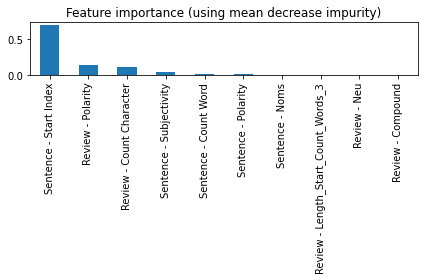

In [8]:
importance = clf.feature_importances_
tree_importance = pd.Series(importance, index=features)
top_tree_importance = tree_importance.sort_values(ascending=False)[:10]

fig, ax = plt.subplots()
ax.set_title('Feature importance (using mean decrease impurity)')
top_tree_importance.plot.bar(ax=ax)
fig.tight_layout()

Grosse importance de la part du 'Start Index', cela peut influer sur les performances par la suite si on se base trop sur ce prédicteur.

<h3> Et si on ajoutait le nombre de phrases (consécutives) du même type? </h3>

In [9]:
new_features = features+['Sentence - Consecutive sentence type']
len(new_features)

21

In [10]:
def create_new_features(group):
    # Prédicteur: type de la dernière phrase
    array_last_sentence = np.zeros(len(group), dtype=np.int32)
    array_last_sentence[1:] = group['Target_Variable_Sentence_Type'][:-1]
    group['Sentence - Last sentence type'] = array_last_sentence

    # Prédicteur: nombre de phrases consécutifs du même type
    array_cons_sentence_type = np.zeros(len(group), dtype=np.int32)
    consecutive_type = 0
    for i, (type_sentence, type_last_sentence) in enumerate(zip(group['Target_Variable_Sentence_Type'][1:],
                                                                group['Target_Variable_Sentence_Type'][:-1])):
        if type_sentence == type_last_sentence:
            consecutive_type += 1
        else:
            consecutive_type = 0
        array_cons_sentence_type[i] = consecutive_type

    group['Sentence - Consecutive sentence type'] = array_cons_sentence_type
    # group['Sentence - Advancement in review'] = np.linspace(0, 1, len(group['Target_Variable_Sentence_Type']))

    return group

df_group = df.groupby(['Review - Title of the Play'])

df_essential_features_and_type = df_group.apply(create_new_features)

In [11]:
X = df_essential_features_and_type[new_features]

y = df_2_classes[["Target_Variable_Sentence_Type"]]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

# Create Decision Tree classifer object
# clf = DecisionTreeClassifier(min_samples_leaf=10)

# Create Random Forest Classifier object
clf = RandomForestClassifier(min_samples_leaf=10, max_features=int(X_train.shape[1]/3))

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predicting the test results
y_pred = clf.predict(X_test)

# Classification results on test set
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

cm=confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred, target_names=['Intro & Plot', 'Others']))

C:\Users\theo-\AppData\Local\Temp/ipykernel_10924/1228302147.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(X_train, y_train)


Accuracy: 0.90
Confusion Matrix: 
 [[144  19]
 [ 15 147]]
              precision    recall  f1-score   support

Intro & Plot       0.91      0.88      0.89       163
      Others       0.89      0.91      0.90       162

    accuracy                           0.90       325
   macro avg       0.90      0.90      0.90       325
weighted avg       0.90      0.90      0.90       325



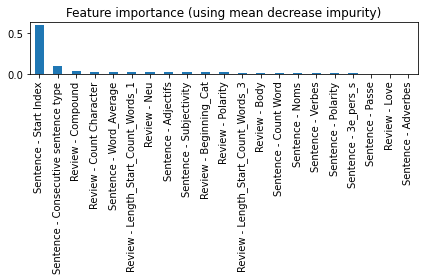

In [12]:
importance = clf.feature_importances_
tree_importance = pd.Series(importance, index=new_features)
top_tree_importance = tree_importance.sort_values(ascending=False)

fig, ax = plt.subplots()
ax.set_title('Feature importance (using mean decrease impurity)')
top_tree_importance.plot.bar(ax=ax)
fig.tight_layout()

In [13]:
df_2_classes['Review - Title of the Play'] = df['Review - Title of the Play']
y_2_classes = df_2_classes.groupby(['Review - Title of the Play'])

In [14]:
Y_pred = []
Y_true = []

for ((name, group), (y_name, y_group)) in zip(df_group, y_2_classes):
    index_sentence = 0
    type_last_sentence = 0
    consecutive_type = 1
    for X, y_true in zip(np.array(group[features]), y_group['Target_Variable_Sentence_Type']):
        # Ajout du prédicteur
        X = np.append(X, consecutive_type)

        # Augmentation de la dimension (pour devenir matrice) puis prédiction
        X = np.expand_dims(X, axis=0)
        y_pred = clf.predict(X)
    
        # Ajout de l'état prédit
        Y_pred.append(y_pred)
        Y_true.append(y_true)

        # Mise à jour du predicteur
        if y_pred == type_last_sentence:
            consecutive_type += 1
        else:
            consecutive_type = 0
        type_last_sentence = y_pred
        index_sentence += 1

In [15]:
accuracy = metrics.accuracy_score(Y_true, Y_pred)
print("Accuracy: {:.2f}".format(accuracy))

cm=confusion_matrix(Y_true, Y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(Y_true, Y_pred, target_names=['Intro & Plot', 'Others']))

Accuracy: 0.88
Confusion Matrix: 
 [[328  12]
 [ 64 246]]
              precision    recall  f1-score   support

Intro & Plot       0.84      0.96      0.90       340
      Others       0.95      0.79      0.87       310

    accuracy                           0.88       650
   macro avg       0.90      0.88      0.88       650
weighted avg       0.89      0.88      0.88       650



<h2>On regarde si il est possible d'enlever des prédicteurs pour allèger le modèle </h2>

In [16]:
light_features = ['Review - Compound', 'Review - Count Character',
                  'Sentence - Word_Average', 'Sentence - Start Index',
                  'Sentence - Consecutive sentence type']

In [17]:
X = df_essential_features_and_type[light_features]

y = df_2_classes[["Target_Variable_Sentence_Type"]]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

# Create Decision Tree classifer object
# clf = DecisionTreeClassifier(min_samples_leaf=10)

# Create Random Forest Classifier object
clf = RandomForestClassifier(min_samples_leaf=10, max_features=int(X_train.shape[1]/3))

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predicting the test results
y_pred = clf.predict(X_test)

# Classification results on test set
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

cm=confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred, target_names=['Intro & Plot', 'Others']))

C:\Users\theo-\AppData\Local\Temp/ipykernel_10924/3687430133.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(X_train, y_train)


Accuracy: 0.86
Confusion Matrix: 
 [[143  20]
 [ 24 138]]
              precision    recall  f1-score   support

Intro & Plot       0.86      0.88      0.87       163
      Others       0.87      0.85      0.86       162

    accuracy                           0.86       325
   macro avg       0.86      0.86      0.86       325
weighted avg       0.86      0.86      0.86       325



<h2> On valide !! On passe de 0.87 avec 21 features à 0.86 avec 5 features </h2>

In [18]:
import pickle
filename = '../Save Models/finalized_model_tree_v3_sentence_just_sentence.sav'
pickle.dump(clf, open(filename, 'wb'))